In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import datetime as dt
from sklearn.cluster import DBSCAN

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_json('data/livedata.json')
data.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


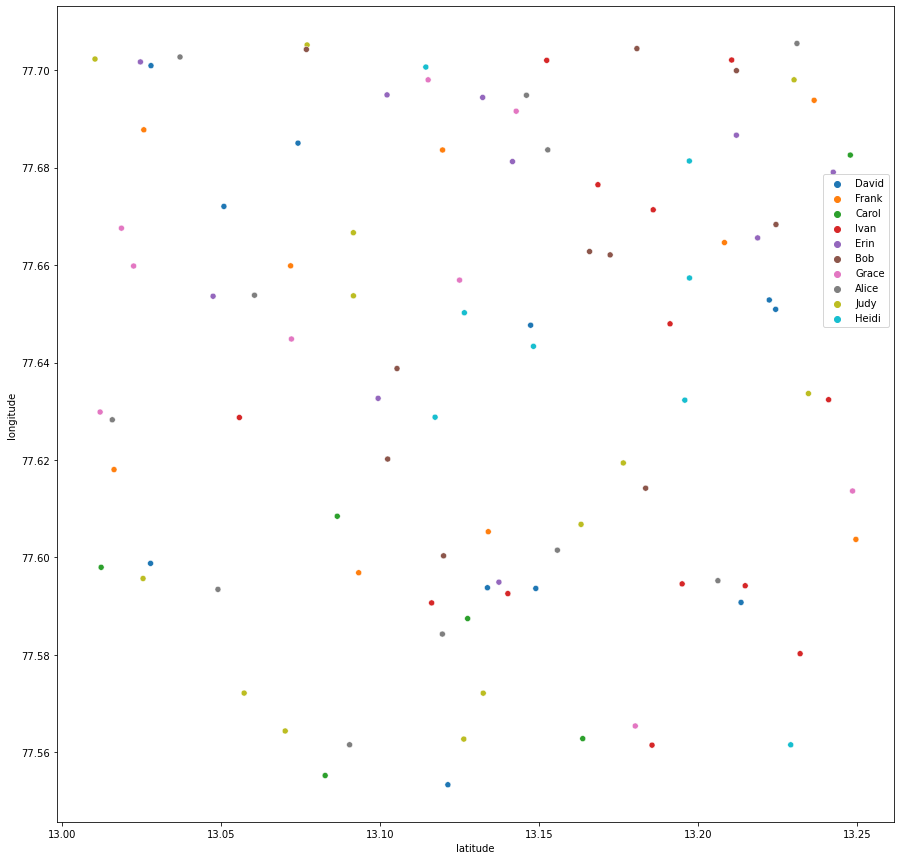

In [5]:
plt.figure(figsize=(15,15))
sbn.scatterplot(x='latitude', y='longitude', data=data, hue='id')
plt.legend(bbox_to_anchor = [1,0.8])
plt.show()

In [10]:
epsilon = 0.0018288
model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(data[['latitude', 'longitude']])

In [19]:
def infected(name, df):
    
    epsilon = 0.0018288
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()
    
    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])
                
        
    infected_names = []
    for cluster in input_name_clusters:
        if cluster != 1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != name):
                    infected_names.append(member_id)
                else:
                    pass
        
    return infected_names

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


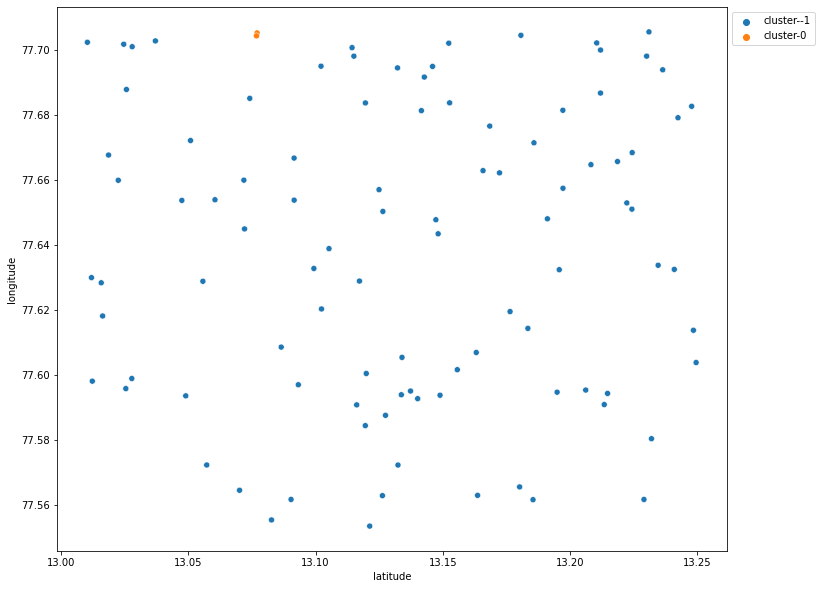

In [20]:
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sbn.scatterplot(data['latitude'], data['longitude'], hue = ['cluster-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])
plt.show()

In [21]:
print(infected("Erin", data))

['David', 'Frank', 'Carol', 'Ivan', 'Bob', 'Grace', 'Alice', 'Judy', 'Heidi']
